# 0. install packages



In [1]:
!pip install langchain
!pip install openai
!pip install tiktoken
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d74d731679d5bcaa1b147ae81ebc381499d66f616349c5d6

In [22]:
import pandas as pd
from getpass import getpass
import os
from langchain.evaluation import load_evaluator
from sentence_transformers import SentenceTransformer, util
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu

# 1. Load the questions and answers


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/UR/Data/qa.csv'

df = pd.read_csv(file_path)

df.head()

,Nr.,question,nlp_related,expert,lc_bot,chat_gpt
0,1,What is the purpose of Regular Expressions in ...,1,Regular Expressions (regex) are essential tool...,Regular Expressions (regex) are an important t...,Regular Expressions (regex) play a vital role ...
1,2,Explain the concept of Vector Semantics and Em...,1,Vector semantics is the standard way to repres...,Vector semantics and embeddings are concepts u...,Vector semantics and embeddings are fundamenta...
2,3,"What is an N-gram language model, and how is i...",1,An n-gram is the simplest language model (LM) ...,An N-gram language model is a type of language...,An N-gram language model is a statistical lang...
3,4,How does the Naive Bayes algorithm work in tex...,1,The Naive Bayes Algorithm is a classification...,The Naive Bayes algorithm is used in text clas...,The Naive Bayes algorithm is a probabilistic m...
4,5,"How is logistic regression applied in NLP, and...",1,"In natural language processing, logistic regre...",Logistic regression is commonly applied in Nat...,Logistic regression is a popular and simple ma...


# 2. Evaluation: calculate the scores by comparing the output embeddings
## 2.1 Pairwise embedding distance (LangChain/OpenAI)

The Pairwise Embedding Distance measures the vector distance (cosine) between the two embeddings (OpenAI).

**Note**: This returns a **distance** score, meaning that the **lower** the number, the **more** similar the outputs are, according to their embedded representation.

[LangChain documentation](https://python.langchain.com/docs/guides/evaluation/comparison/pairwise_embedding_distance)

In [5]:
# get API-Key
OPENAI_API_KEY = getpass('Enter OpenAi API key: ')

Enter OpenAi API key: ··········


In [6]:
# set API key as environment variable
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [7]:
# load evaluator
evaluator = load_evaluator("pairwise_embedding_distance")

In [8]:
# Pairwise Embedding Score for Expert/Lingception Bot
df['ped_lc_bot'] = df.apply(lambda row: evaluator({'prediction_b': row['expert'], 'prediction': row['lc_bot']})['score'], axis=1)

In [9]:
# Pairwise Embedding Score for Expert/ChatGPT
df['ped_chat_gpt'] = df.apply(lambda row: evaluator({'prediction_b': row['expert'], 'prediction': row['chat_gpt']})['score'], axis=1)

In [10]:
df

,Nr.,question,nlp_related,expert,lc_bot,chat_gpt,ped_lc_bot,ped_chat_gpt
0,1,What is the purpose of Regular Expressions in ...,1,Regular Expressions (regex) are essential tool...,Regular Expressions (regex) are an important t...,Regular Expressions (regex) play a vital role ...,0.028515,0.030431
1,2,Explain the concept of Vector Semantics and Em...,1,Vector semantics is the standard way to repres...,Vector semantics and embeddings are concepts u...,Vector semantics and embeddings are fundamenta...,0.040955,0.048644
2,3,"What is an N-gram language model, and how is i...",1,An n-gram is the simplest language model (LM) ...,An N-gram language model is a type of language...,An N-gram language model is a statistical lang...,0.044786,0.056564
3,4,How does the Naive Bayes algorithm work in tex...,1,The Naive Bayes Algorithm is a classification...,The Naive Bayes algorithm is used in text clas...,The Naive Bayes algorithm is a probabilistic m...,0.055940,0.049521
4,5,"How is logistic regression applied in NLP, and...",1,"In natural language processing, logistic regre...",Logistic regression is commonly applied in Nat...,Logistic regression is a popular and simple ma...,0.056311,0.058081
5,6,What are the key benefits of using vector sema...,1,There are many benefits of vector semantics an...,The key benefits of using vector semantics and...,Vector semantics and word embeddings have revo...,0.039119,0.054817
6,7,How do neural networks and neural language mod...,1,Neural networks and neural language models con...,Neural networks and neural language models con...,Neural networks and neural language models hav...,0.047811,0.050008
7,8,"What is sequence labeling in NLP, and how is i...",1,Sequence labeling is a task in which each word...,Sequence labeling in NLP refers to the task of...,Sequence labeling is a natural language proces...,0.023534,0.024983
8,9,What are Recurrent Neural Networks (RNNs) and ...,1,A recurrent neural network (RNN) is any networ...,Recurrent Neural Networks (RNNs) are a type of...,Recurrent Neural Networks (RNNs) and Long Shor...,0.029143,0.061773
9,10,"What are transformers, and how have pretrained...",1,Transformers map sequences of input vectors to...,Transformers are a type of architecture common...,Transformers are a type of deep learning model...,0.033110,0.048849


## 2.2 Semantic Textual Similarity (HuggingFace)

The chosen model calculates the cosine similarity of two given output texts.

**Note**: This returns a **similarity** score, meaning that the **higher** the number, the **more** similar the outputs are, according to their embedded representation.

[HuggingFace documentation](https://huggingface.co/tasks/sentence-similarity)

[Sentence Similarity Usage / sbert.net](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)

Model: [all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2), Benchmark: [sbert.net](https://www.sbert.net/docs/pretrained_models.html)

In [11]:
# Semantic Textual Similarity for Expert / Lingception Bot
model = SentenceTransformer('all-MiniLM-L6-v2')

df['sts_lc_bot'] = float('NaN')

for index, row in df.iterrows():
    expert_text = row['expert']
    chat_gpt_text = row['lc_bot']

    expert_embedding = model.encode(expert_text, convert_to_tensor=True)
    chat_gpt_embedding = model.encode(chat_gpt_text, convert_to_tensor=True)

    df.at[index, 'sts_lc_bot'] = util.pytorch_cos_sim(expert_embedding, chat_gpt_embedding).item()

In [12]:
# Semantic Textual Similarity for Expert / ChatGPT
df['sts_chat_gpt'] = float('NaN')

for index, row in df.iterrows():
    expert_text = row['expert']
    chat_gpt_text = row['chat_gpt']

    expert_embedding = model.encode(expert_text, convert_to_tensor=True)
    chat_gpt_embedding = model.encode(chat_gpt_text, convert_to_tensor=True)

    df.at[index, 'sts_chat_gpt'] = util.pytorch_cos_sim(expert_embedding, chat_gpt_embedding).item()

In [13]:
df

,Nr.,question,nlp_related,expert,lc_bot,chat_gpt,ped_lc_bot,ped_chat_gpt,sts_lc_bot,sts_chat_gpt
0,1,What is the purpose of Regular Expressions in ...,1,Regular Expressions (regex) are essential tool...,Regular Expressions (regex) are an important t...,Regular Expressions (regex) play a vital role ...,0.028515,0.030431,0.920006,0.901248
1,2,Explain the concept of Vector Semantics and Em...,1,Vector semantics is the standard way to repres...,Vector semantics and embeddings are concepts u...,Vector semantics and embeddings are fundamenta...,0.040955,0.048644,0.783229,0.884506
2,3,"What is an N-gram language model, and how is i...",1,An n-gram is the simplest language model (LM) ...,An N-gram language model is a type of language...,An N-gram language model is a statistical lang...,0.044786,0.056564,0.864667,0.815175
3,4,How does the Naive Bayes algorithm work in tex...,1,The Naive Bayes Algorithm is a classification...,The Naive Bayes algorithm is used in text clas...,The Naive Bayes algorithm is a probabilistic m...,0.055940,0.049521,0.875851,0.865338
4,5,"How is logistic regression applied in NLP, and...",1,"In natural language processing, logistic regre...",Logistic regression is commonly applied in Nat...,Logistic regression is a popular and simple ma...,0.056311,0.058081,0.770566,0.811553
5,6,What are the key benefits of using vector sema...,1,There are many benefits of vector semantics an...,The key benefits of using vector semantics and...,Vector semantics and word embeddings have revo...,0.039119,0.054817,0.869982,0.690411
6,7,How do neural networks and neural language mod...,1,Neural networks and neural language models con...,Neural networks and neural language models con...,Neural networks and neural language models hav...,0.047811,0.050008,0.763618,0.774933
7,8,"What is sequence labeling in NLP, and how is i...",1,Sequence labeling is a task in which each word...,Sequence labeling in NLP refers to the task of...,Sequence labeling is a natural language proces...,0.023534,0.024983,0.886743,0.871802
8,9,What are Recurrent Neural Networks (RNNs) and ...,1,A recurrent neural network (RNN) is any networ...,Recurrent Neural Networks (RNNs) are a type of...,Recurrent Neural Networks (RNNs) and Long Shor...,0.029143,0.061773,0.885091,0.866084
9,10,"What are transformers, and how have pretrained...",1,Transformers map sequences of input vectors to...,Transformers are a type of architecture common...,Transformers are a type of deep learning model...,0.033110,0.048849,0.886944,0.821289


# 3. Statistics


## 3.1 Hypothesis
Null Hypothesis (H0): There is no significant difference in the similarity scores between langchain-Bot and ChatGPT.

Alternative Hypothesis (Ha): There is a significant difference in the similarity scores between langchain-Bot and ChatGPT.

## 3.2 Descriptive Stats

In [14]:
# summary statistics
summary_stats = df[['ped_chat_gpt','ped_lc_bot', 'sts_chat_gpt', 'sts_lc_bot']].describe()

print(summary_stats)

       ped_chat_gpt  ped_lc_bot  sts_chat_gpt  sts_lc_bot
count     30.000000   30.000000     30.000000   30.000000
mean       0.068638    0.091296      0.763105    0.727971
std        0.050624    0.083128      0.180835    0.254150
min        0.021883    0.012238      0.129208    0.019427
25%        0.042943    0.031201      0.761474    0.740119
50%        0.054897    0.051875      0.811329    0.822545
75%        0.076374    0.142852      0.865897    0.886330
max        0.237023    0.302611      0.959436    0.980739


In [15]:
# Calculate the means based on the 'nlp_related' column
grouped_means = df.groupby('nlp_related')[['ped_lc_bot', 'ped_chat_gpt','sts_lc_bot', 'sts_chat_gpt']].mean()

grouped_means

,ped_lc_bot,ped_chat_gpt,sts_lc_bot,sts_chat_gpt
nlp_related,,,,
0,0.206416,0.095558,0.461863,0.696864
1,0.049434,0.058848,0.824738,0.787193


In [16]:
# new df from just the nlp related answers
nlp_df = df[df['nlp_related'] == 1]

## 3.3 Visualisation

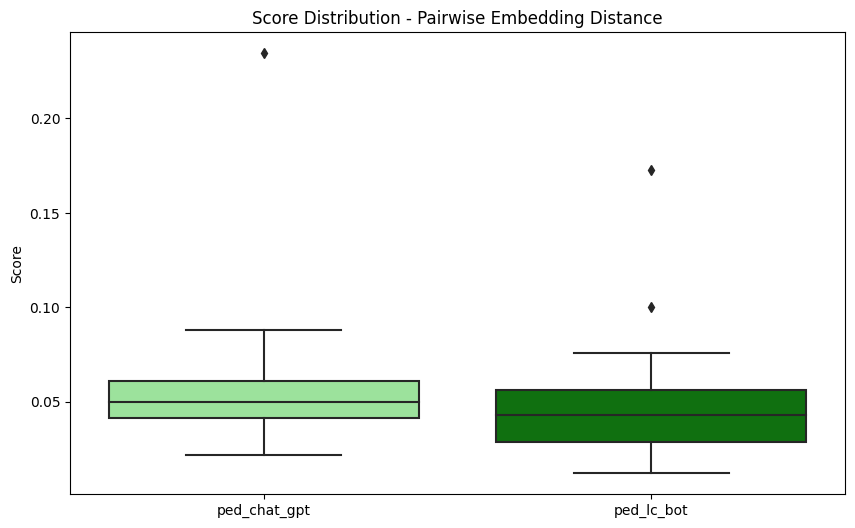

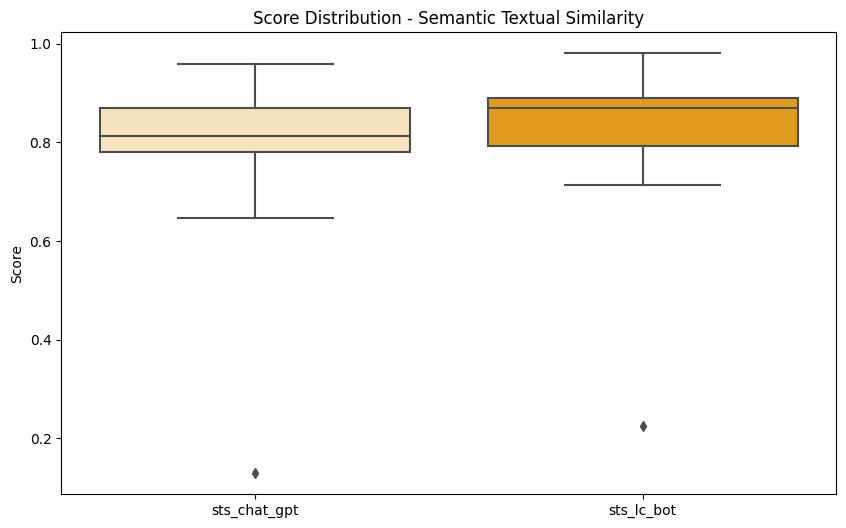

In [17]:
palette = {'ped_chat_gpt': 'lightgreen', 'ped_lc_bot': 'green',
           'sts_chat_gpt': 'moccasin', 'sts_lc_bot': 'orange'}

# boxplot for Pairwise Embedding Score
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=nlp_df[['ped_chat_gpt', 'ped_lc_bot']], orient='vertical', palette=palette)
ax.set_ylabel('Score')
ax.set_title('Score Distribution - Pairwise Embedding Distance')
plt.show()

# boxplot for Semantic Answer Similarity
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=nlp_df[['sts_chat_gpt', 'sts_lc_bot']], orient='vertical', palette=palette)
ax.set_ylabel('Score')
ax.set_title('Score Distribution - Semantic Textual Similarity')
plt.show()


## 3.4 Test for Normality
Perform Shapiro-Wilk test for normality.

In [18]:
# Shapiro-Wilk for PED-Data
data_ped_lc_bot = nlp_df['ped_lc_bot']
data_ped_chat_gpt = nlp_df['ped_chat_gpt']

shapiro_lc_bot = stats.shapiro(data_ped_lc_bot)
shapiro_chat_gpt = stats.shapiro(data_ped_chat_gpt)

print("Shapiro-Wilk Test for 'ped_lc_bot':")
print("Statistic:", shapiro_lc_bot[0])
print("p-value:", shapiro_lc_bot[1])

print("\nShapiro-Wilk Test for 'ped_chat_gpt':")
print("Statistic:", shapiro_chat_gpt[0])
print("p-value:", shapiro_chat_gpt[1])


Shapiro-Wilk Test for 'ped_lc_bot':
Statistic: 0.7853360176086426
p-value: 0.0002975798270199448

Shapiro-Wilk Test for 'ped_chat_gpt':
Statistic: 0.591897189617157
p-value: 1.0872175835174858e-06


In [19]:
# Shapiro-Wilk for STS-Data
data_sts_lc_bot = nlp_df['sts_lc_bot']
data_sts_chat_gpt = nlp_df['sts_chat_gpt']

shapiro_lc_bot = stats.shapiro(data_sts_lc_bot)
shapiro_chat_gpt = stats.shapiro(data_sts_chat_gpt)

print("Shapiro-Wilk Test for 'sts_lc_bot':")
print("Statistic:", shapiro_lc_bot[0])
print("p-value:", shapiro_lc_bot[1])

print("\nShapiro-Wilk Test for 'sts_chat_gpt':")
print("Statistic:", shapiro_chat_gpt[0])
print("p-value:", shapiro_chat_gpt[1])


Shapiro-Wilk Test for 'sts_lc_bot':
Statistic: 0.6275284886360168
p-value: 2.6664131382858614e-06

Shapiro-Wilk Test for 'sts_chat_gpt':
Statistic: 0.6680928468704224
p-value: 7.892293069744483e-06


## 3.5 Wilcoxon Rank-Sum Test
The data is not normaliy distributed, so non-parametric test:

Wilcoxon Rank-Sum Test (Mann-Whitney U) on both scores.



In [23]:
# Mann-Whitney U Test on PED
statistic, p_value = mannwhitneyu(data_ped_lc_bot, data_ped_chat_gpt)

print("Mann-Whitney U Test on PED data:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test on PED data:
Statistic: 182.0
p-value: 0.16252749146067402


In [25]:
# Mann-Whitney U Test on STS
statistic, p_value = mannwhitneyu(data_sts_lc_bot, data_sts_chat_gpt)

print("Mann-Whitney U Test on STS:")
print("Statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U Test on STS:
Statistic: 303.0
p-value: 0.15558034779219784


## 3.6 Interpretation
Both p-values are greater than the significance level alpha=0.05.

Therefore we have not enough evidence to reject the null hypthesis.